# Meshgrid - Single Figure Report on Brazil's Place in Global Coffee Market
* Create a Meshgrid Layout to combine our findings from our first project into a single report. 
* We want the two donut charts representing Brazil's production share in 1990 and 2018 in the top third of the figure. 
* The stackplot comparing Brazil to the rest of the world in the center of the figure. 
* In the bottom third a bar chart showing the total production of our top 5 countries, as well as a bar for other. Also include a pie chart showing the composition of the same data plotted in the bar chart. 
* Look up the country colors for our top 5 countries and color them accordingly. For 'other' category, color these grey.
* Consider setting rcParams to turn top and right borders off.
* Save the report out as an image.


## Short steps
* Donut chart 
    * Brazil’s share in 1990
    * Brazil’s share in 2018 
* How Brazil’s share of global production has changed over time (composition over time chart, Area chart) 
* Top 5 coffee producers & rest of countries (Pie chart) 
* Total Production for Top 5 Nations as well as remained nations in one bar 

## Dataset 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [3]:
coffee_prod = pd.read_csv(r'E:\Python Data Visualization Matplotlib_Seaborn Masterclass\Data+Viz+with+Matplotlib+&+Seaborn\Data Viz with Matplotlib & Seaborn\Data\coffee\total-production.csv', 
                          delimiter=',')

coffee_prod.head()

,total_production,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,50.3450,79.3310,77.5200,32.6080,76.802,62.1090,70.925,64.330,85.3440,...,13.4200,34.9700,28.7150,32.7900,34.9350,39.4050,40.5150,44.8300,35.0060,40.3874
1,Bolivia (Plurinational State of),122.7770,103.5360,120.2350,50.8230,116.944,142.4850,124.579,140.719,137.9850,...,128.4751,117.2249,131.8354,105.2812,119.9122,99.8766,84.2191,77.9835,83.8112,82.5687
2,Brazil,27285.6286,27293.4934,34603.3542,28166.9786,28192.047,18060.2022,29196.743,26148.004,36760.8533,...,43976.8120,55428.4102,48591.8289,55418.0012,54688.9664,53304.7669,52870.5876,56788.1784,52739.8635,62924.8836
3,Burundi,487.3930,667.1990,620.2380,393.3540,664.143,433.9800,400.969,249.785,491.9920,...,111.6130,352.9776,204.1328,405.9615,163.2177,247.5500,274.1017,248.7933,202.1079,178.4206
4,Ecuador,1503.8150,2123.8240,1185.4800,2069.0070,2375.766,1888.2330,1992.914,1190.663,1205.9680,...,813.2849,853.9798,825.4144,828.1024,665.5450,644.0112,644.4926,644.8845,623.5744,601.0001


In [4]:
coffee_prod_T = coffee_prod.T
coffee_prod_T.columns = coffee_prod_T.iloc[0, :]
coffee_prod_T.drop('total_production', axis=0, inplace=True)
coffee_prod_T.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


### stackplot

Text(0.5, 0.98, 'Brazils share of global production 1990-2018')

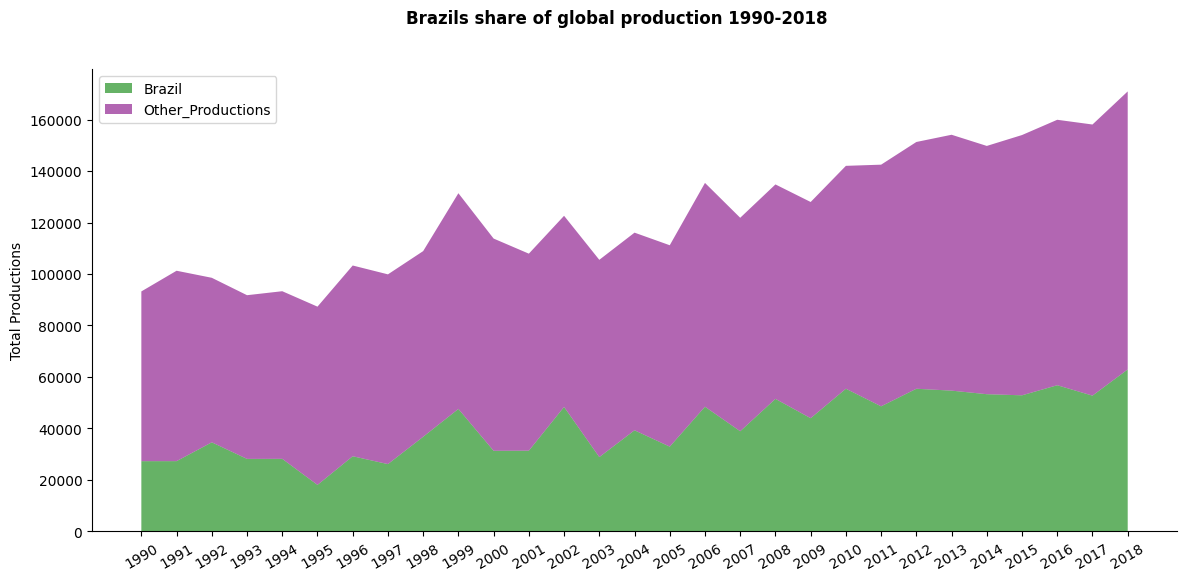

In [5]:
brazil_vs_overallWorld_prod = coffee_prod_T.assign(Other_Productions = coffee_prod_T.loc[:, coffee_prod_T.sum(axis=0).sort_values(ascending=False).index].iloc[:, 1:].sum(axis=1)
                                                   ).loc[:, ['Brazil', 'Other_Productions']].astype({'Brazil':'float64', 'Other_Productions':'float64'})

# brazil_vs_overallWorld_prod.plot()
brazil_vs_overallWorld_prod.dtypes
fig, ax = plt.subplots(figsize=(14, 6))
ax.stackplot(brazil_vs_overallWorld_prod.index, brazil_vs_overallWorld_prod['Brazil'], brazil_vs_overallWorld_prod['Other_Productions'], colors=['green', 'purple'], alpha=0.6)
ax.xaxis.set_tick_params(rotation=30)
ax.legend(brazil_vs_overallWorld_prod.columns)
ax.spines[['right', 'top']].set_visible(False)
ax.set_ylabel('Total Productions', fontsize=10)
fig.suptitle("Brazils share of global production 1990-2018", fontweight='bold', fontsize=12)

### Pie chart

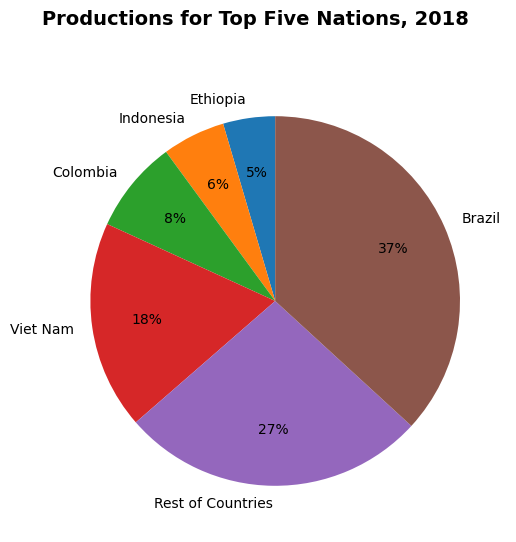

In [6]:
t = coffee_prod_T.loc[['2018'], :].T.sort_values('2018', ascending=False).iloc[5:].sum().reset_index().drop('index', axis=1)
t.columns = ['2018']
t.index = ['Rest of Countries']
t


pie_data = pd.concat(
   [coffee_prod_T.loc[['2018'], :].T.sort_values('2018', ascending=False).iloc[:5],t]
).sort_values('2018', ascending=False)

pie_data



fig, ax = plt.subplots(figsize=(16, 6))
ax.pie( x=pie_data['2018'][::-1], 
       labels = pie_data.index[::-1], 
       startangle=90, 
       autopct = '%.0f%%', 
       pctdistance= 0.7
        )
# ax.set_facecolor('black')
fig.suptitle('Productions for Top Five Nations, 2018', fontweight='bold', fontsize=14)
# plt.figure(facecolor='black')
plt.show()

### Bar chart

<BarContainer object of 6 artists>

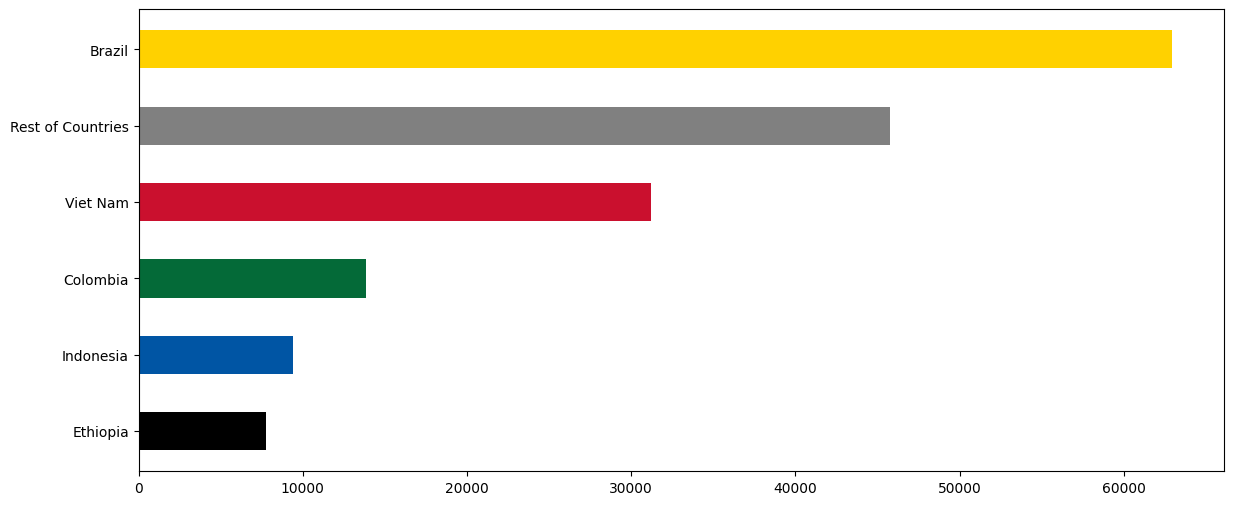

In [7]:
bar_data = pie_data[::-1]

colors= ['#000000', '#0055A4', '#046A38', '#CA102E', 'grey', '#FFD100']
fig, ax = plt.subplots(figsize=(14,6))
ax.barh(y=bar_data.index, width=bar_data['2018'], height=0.5, color=colors)

### Donut charts 

Text(0, 0, '41.38%')

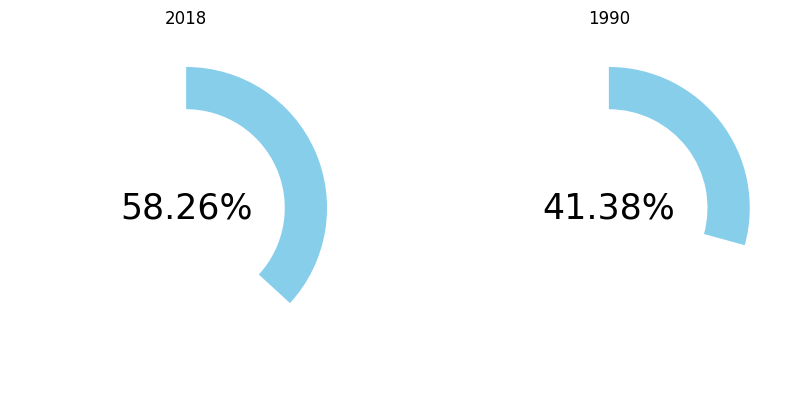

In [8]:
brazil_vs_others = pd.concat([coffee_prod_T.loc[['1990', '2018'], :].T.query("total_production == 'Brazil'"),
           pd.DataFrame({'Rest of World': coffee_prod_T.loc[['1990', '2018'], :].T.query("total_production != 'Brazil'").sum()}).T ])
fig, axes = plt.subplots(1,2, figsize=(10,5))
# print(axes)
# print(list(zip(axes, brazil_vs_others.columns[::-1])))
for ax, col in zip(axes, brazil_vs_others.columns[::-1]):
    ax.pie(brazil_vs_others[col][::-1],
            wedgeprops=dict(width=.3), 
            startangle=90, 
            colors=['white', 'skyblue'])
    ax.set(ylabel='', 
           title=col, 
           aspect='equal'
           )


plt.text(-3, 0, s=f'{round((brazil_vs_others.loc['Brazil', '2018']/ brazil_vs_others.loc['Rest of World', '2018']) * 100, 2)}%', fontsize=25, ha = 'center', va='center', color='black')

plt.text(0, 0, s=f'{round((brazil_vs_others.loc['Brazil', '1990']/ brazil_vs_others.loc['Rest of World', '1990']) * 100, 2)}%', fontsize=25, ha = 'center', va='center', color='black')

### Final Report 

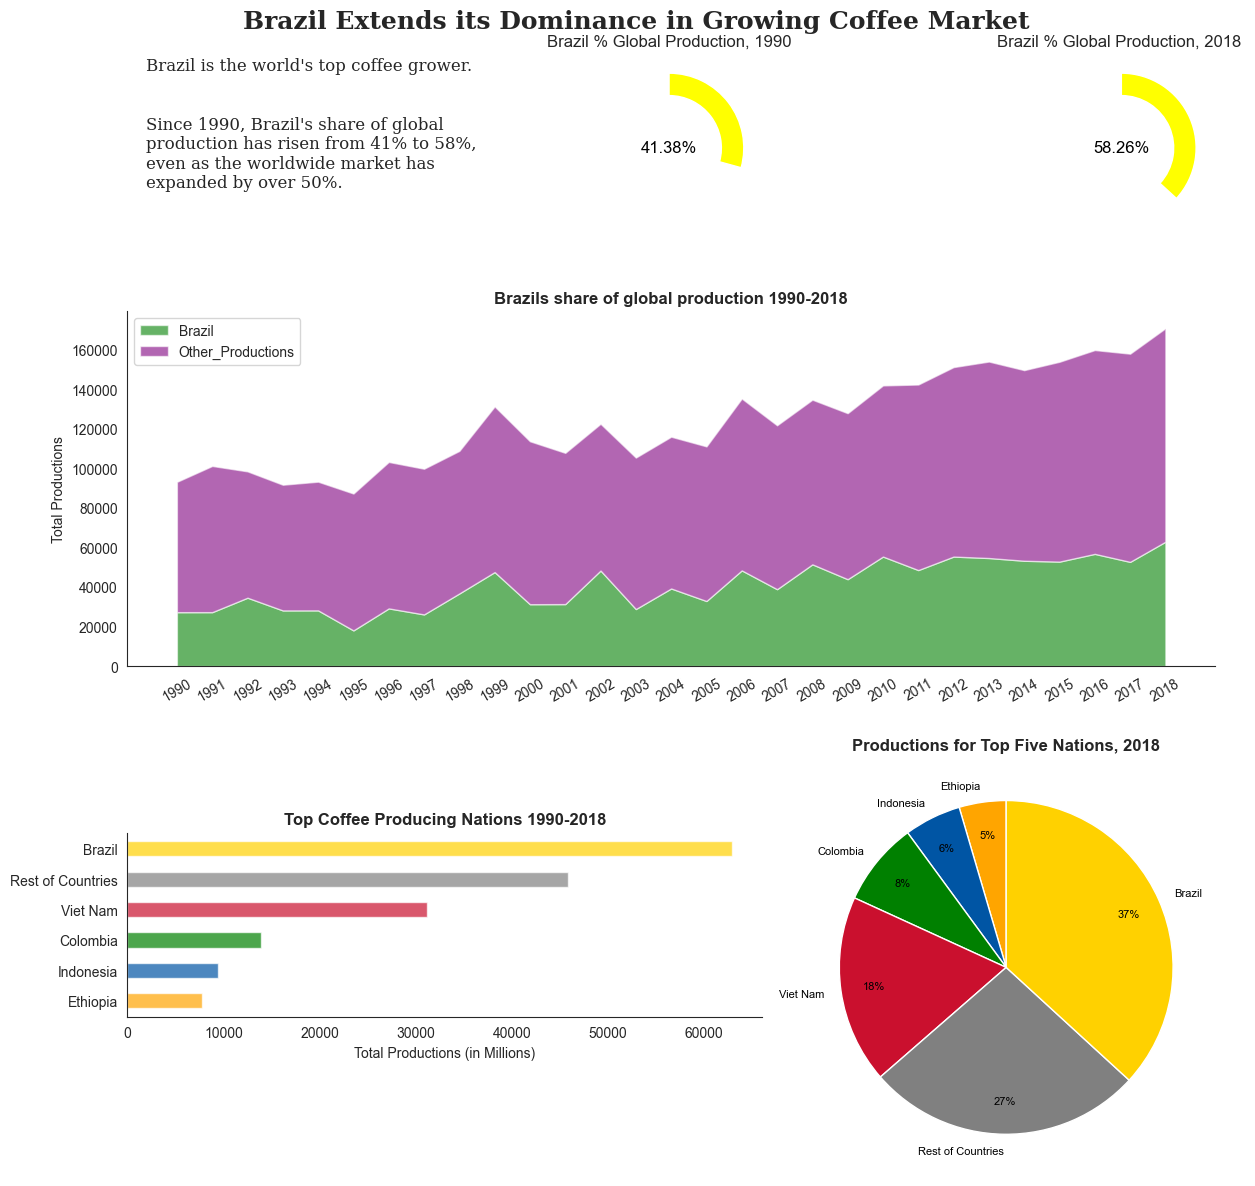

In [9]:
sns.set_style('white')
plt.rc('axes.spines', top=False, right=False)
fig = plt.figure(constrained_layout=True, figsize=(14, 12))
gs = gridspec.GridSpec(18, 6, fig)
fig.suptitle("Brazil Extends its Dominance in Growing Coffee Market", 
             fontsize=18, 
             fontweight="bold",
             fontfamily='serif',
             x=0.45, y=1
            )

# gs.tight_layout(fig)
fig.text(.1, .835, 
'''Brazil is the world's top coffee grower.


Since 1990, Brazil's share of global 
production has risen from 41% to 58%, 
even as the worldwide market has 
expanded by over 50%.
'''

, fontsize=12, fontweight='light', fontfamily='serif')



########################top
ax1_1 = fig.add_subplot(gs[0:4, 2:3])
ax1_1.pie(brazil_vs_others['1990'][::-1],
            wedgeprops=dict(width=.3), 
            startangle=90, 
            colors=['white', 'yellow'])
ax1_1.set(ylabel='', 
           title="Brazil % Global Production, 1990", 
           aspect='equal'
           )

plt.text(0, 0, s=f'{round((brazil_vs_others.loc['Brazil', '1990']/ brazil_vs_others.loc['Rest of World', '1990']) * 100, 2)}%', fontsize=12, ha = 'center', va='center', color='black')


ax1_2 = fig.add_subplot(gs[0:4, 4:5])
ax1_2.pie(brazil_vs_others['2018'][::-1],
            wedgeprops=dict(width=.3), 
            startangle=90, 
            colors=['white', 'yellow'])
ax1_2.set(ylabel='', 
           title="Brazil % Global Production, 2018 ", 
           aspect='equal'
           )
plt.text(0, 0, s=f'{round((brazil_vs_others.loc['Brazil', '2018']/ brazil_vs_others.loc['Rest of World', '2018']) * 100, 2)}%', fontsize=12, ha = 'center', va='center', color='black')



##################################center
ax2 = fig.add_subplot(gs[4:9, 0:5])
ax2.stackplot(brazil_vs_overallWorld_prod.index, brazil_vs_overallWorld_prod['Brazil'], brazil_vs_overallWorld_prod['Other_Productions'], colors=['green', 'purple'], alpha=0.6)
ax2.xaxis.set_tick_params(rotation=30)
ax2.legend(brazil_vs_overallWorld_prod.columns)
# ax2.spines[['right', 'top']].set_visible(False)
ax2.set_ylabel('Total Productions', fontsize=10)
ax2.set_title("Brazils share of global production 1990-2018", fontweight='bold', fontsize=12)




##############################bottom 
bar_data = pie_data[::-1]
colors= ['orange', '#0055A4', 'green', '#CA102E', 'grey', '#FFD100']
ax3 =fig.add_subplot(gs[12:15, 0:3])
ax3.barh(y=bar_data.index, width=bar_data['2018'], height=0.5, color=colors, alpha=0.7)
ax3.set_xlabel('Total Productions (in Millions)', fontsize=10)
# ax3.spines[['right', 'top']].set_visible(False)
ax3.set_title('Top Coffee Producing Nations 1990-2018', fontweight='bold', fontsize=12)

ax3_2 = fig.add_subplot(gs[11:17, 3:5])
ax3_2.pie( x=pie_data['2018'][::-1], 
       labels = pie_data.index[::-1], 
       startangle=90, 
       autopct = '%.0f%%', 
       pctdistance= 0.8, 
       textprops =dict(color="black", fontsize=8, ),
       colors=colors
        )
ax3_2.set_title('Productions for Top Five Nations, 2018', fontweight='bold', fontsize=12)

plt.savefig(r'E:\Python Data Visualization Matplotlib_Seaborn Masterclass\Project1\Global_Coffee_Market\Global_Coffee_Market\Growing_Coffee_Market.jpg')

##########################################################